In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
# Coluna Id é análoga às linhas do DataFrame
df = pd.read_csv("/content/train.csv")

In [110]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [111]:
nan = df.isna().mean()*100
nan[nan > 5] # colunas com mais que 5% de dados nulos

# nesse dataset muitos dos nulos formam uma categoria e têm significado.
# podemos usar alguns daq, mas estão bem desbalanceados.

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [112]:
df.describe() # nada muito incoerente, só desbalanceado

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [113]:
# Temos mais colunas categóricas que numéricas, mas no geral equilibrado
df_numerical = df.select_dtypes(include=np.number)
df_categorical = df.select_dtypes(include='object')
df_categorical.insert(0, 'Id', df['Id'], False)
n_numerical = len(df_numerical.columns) / len(df.columns)
n_categorical = len(df_categorical.columns) / len(df.columns)
print(f'Porcentagem de colunas categóricas: {n_categorical*100:.2f}%')
print(f'Porcentagem de colunas numéricas: {n_numerical*100:.2f}%')

Porcentagem de colunas categóricas: 54.32%
Porcentagem de colunas numéricas: 46.91%


Há dados duplicados no dataset?

In [114]:
duplicados = df[df.duplicated(keep='first')]
print(duplicados)
# Tudo nos conformes

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]


#### Análise de Features Categóricas

In [115]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   Alley          91 non-null     object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  RoofStyle      1460 non-null   object
 15  RoofMatl       1460 non-null   object
 16  Exterior1st    1460 non-null   object
 17  Exterior2nd    1460 non-null   object
 18  MasVnrType     588 non-null 

In [116]:
nan = df_categorical.isna().mean()*100
nan[nan > 5] # colunas categóricas com mais que 5% de dados nulo

Alley           93.767123
MasVnrType      59.726027
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

Vamos dropar colunas com mais de 80% de valores faltantes e prosseguir.

In [117]:
# Dropar colunas onde mais de 80% dos dados são nulos
df_categorical = df_categorical.drop(columns=nan[nan > 80].index)

Vamos ver o número de valores únicos em cada coluna categórica e a frequência de cada valor, para verificar se há outliers na nossa análise categórica.

In [118]:
max_unique = 0
col_max_unique = ""

for col in df_categorical.drop('Id', axis=1).columns:
    if df_categorical[col].nunique() > max_unique:
        max_unique = df_categorical[col].nunique()
        col_max_unique = col

print(f'Coluna com mais valores únicos: {col_max_unique} com {max_unique} valores únicos')
# Tudo parece nos conformes segundo a descrição do dataset

Coluna com mais valores únicos: Neighborhood com 25 valores únicos


In [119]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     588 non-null    object
 18  ExterQual      1460 non-null

Vamos agora preencher os valores faltantes com a moda para as colunas categóricas.

In [120]:
#BrkFace muito mais frequente que os outros valores
df_categorical['MasVnrType'].describe()

count         588
unique          3
top       BrkFace
freq          445
Name: MasVnrType, dtype: object

In [121]:
# Mais ou menos metade dos valores são Gd, interessante fazer random sampling
df_categorical['FireplaceQu'].describe()

count     770
unique      5
top        Gd
freq      380
Name: FireplaceQu, dtype: object

In [122]:
ramdom_sampling_col = 'FireplaceQu'
missing_indices = df_categorical[df_categorical[ramdom_sampling_col].isnull()].index
unique_categories = df_categorical[ramdom_sampling_col].unique()
df_categorical.loc[missing_indices, ramdom_sampling_col] = np.random.choice(unique_categories, len(missing_indices))

In [123]:
# Feito
df_categorical['FireplaceQu'].describe()

count     1353
unique       5
top         Gd
freq       516
Name: FireplaceQu, dtype: object

In [124]:
# Preencher nan com a moda
for col in df_categorical.drop('Id', axis=1).columns:
    df_categorical[col] = df_categorical[col].fillna(df_categorical[col].mode()[0])

É importante fazermos o tratamento dos dados categóricos com `get_dummies` para que possamos usar modelos nos dados que serão convertidos usando one-hot encoding.

In [125]:
df_categorical = pd.get_dummies(df_categorical)

In [126]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 239 entries, Id to SaleCondition_Partial
dtypes: bool(238), int64(1)
memory usage: 350.9 KB


In [127]:
if df_categorical.isnull().values.any(): raise Exception("Ainda há features categóricas nulas!")

Temos muito mais features no nosso dataset para os valores únicos de cada valor categórico. Veremos depois se há correlação forte entre elas e `SalesPrice`.

#### Análise de Features Numéricas

In [128]:
df_numerical = df.select_dtypes(exclude='object')

In [129]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

Excluindo outliers

In [130]:
def exclui_outliers(DataFrame):
  for col_name in list(DataFrame):
    intervalo = 2.7*DataFrame[col_name].std()
    media = DataFrame[col_name].mean()
    DataFrame.loc[df[col_name] < (media - intervalo), col_name] = np.nan
    DataFrame.loc[df[col_name] > (media + intervalo), col_name] = np.nan

exclui_outliers(df_numerical)

In [131]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1420 non-null   float64
 2   LotFrontage    1185 non-null   float64
 3   LotArea        1445 non-null   float64
 4   OverallQual    1437 non-null   float64
 5   OverallCond    1432 non-null   float64
 6   YearBuilt      1451 non-null   float64
 7   YearRemodAdd   1460 non-null   float64
 8   MasVnrArea     1411 non-null   float64
 9   BsmtFinSF1     1450 non-null   float64
 10  BsmtFinSF2     1403 non-null   float64
 11  BsmtUnfSF      1441 non-null   float64
 12  TotalBsmtSF    1449 non-null   float64
 13  1stFlrSF       1443 non-null   float64
 14  2ndFlrSF       1452 non-null   float64
 15  LowQualFinSF   1439 non-null   float64
 16  GrLivArea      1440 non-null   float64
 17  BsmtFullBath   1444 non-null   float64
 18  BsmtHalf

In [132]:
nan = df_numerical.isna().mean()*100
nan[nan > 5] # colunas com mais que 5% de dados nulos

LotFrontage     18.835616
BsmtHalfBath     5.616438
GarageYrBlt      5.958904
dtype: float64

Não há preocupante quantidade de dados nulos, mas não podem ser ignorados. Vamos trocar os valores pela média de cada coluna

In [133]:
# Preencher nan com a média
for col in df_numerical.columns:
    df_numerical[col] = df_numerical[col].fillna(df_numerical[col].mean())

In [134]:
if df_numerical.isnull().values.any(): raise Exception("Ainda há features numéricas nulas!")

### Gráficos e correlações

<Axes: >

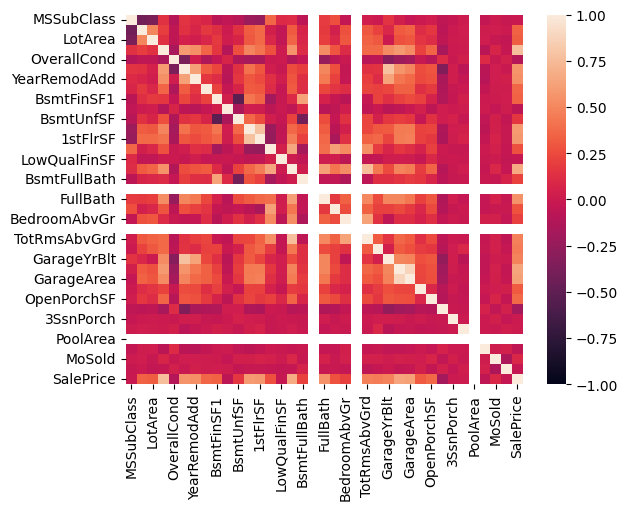

In [135]:
sns.heatmap(df_numerical.drop('Id', axis=1).corr(), annot=False, vmin=-1, vmax=1, fmt=".2f")

- dropar YrSold e MoSold tlvz
- fazer alguma transformação c/ features muito desbalanceadas

#### Análise de Features do tipo Object

#### Unindo valores numéricos e categóricos

In [139]:
df = pd.merge(df_numerical, df_categorical, on="Id")

In [140]:
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,60.0,65.0,8450.0,7.0,5.000000,2003.0,2003.0,196.0,706.0,...,False,False,False,True,False,False,False,False,True,False
1,2.0,20.0,80.0,9600.0,6.0,8.000000,1976.0,1976.0,0.0,978.0,...,False,False,False,True,False,False,False,False,True,False
2,3.0,60.0,68.0,11250.0,7.0,5.000000,2001.0,2002.0,162.0,486.0,...,False,False,False,True,False,False,False,False,True,False
3,4.0,70.0,60.0,9550.0,7.0,5.000000,1915.0,1970.0,0.0,216.0,...,False,False,False,True,True,False,False,False,False,False
4,5.0,60.0,84.0,14260.0,8.0,5.000000,2000.0,2000.0,350.0,655.0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,62.0,7917.0,6.0,5.000000,1999.0,2000.0,0.0,0.0,...,False,False,False,True,False,False,False,False,True,False
1456,1457.0,20.0,85.0,13175.0,6.0,6.000000,1978.0,1988.0,119.0,790.0,...,False,False,False,True,False,False,False,False,True,False
1457,1458.0,70.0,66.0,9042.0,7.0,5.538408,1941.0,2006.0,0.0,275.0,...,False,False,False,True,False,False,False,False,True,False
1458,1459.0,20.0,68.0,9717.0,5.0,6.000000,1950.0,1996.0,0.0,49.0,...,False,False,False,True,False,False,False,False,True,False
